# Data Science Assignment 11 : Text Mining

### ONE:
1) Perform sentimental analysis on the Elon-musk tweets

In [14]:
# Install Libraries if not installed
#%pip install spacy
#!python -m spacy download en_core_web_md
#!pip install wordcloud

In [36]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import spacy
import nltk
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [37]:
# load the dataset
Elon=pd.read_csv(r"Elon_musk.csv",encoding='Latin-1')
Elon.drop(['Unnamed: 0'],inplace=True,axis=1)
Elon

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


### Text Preprocessing

In [38]:
Elon=[Text.strip() for Text in Elon.Text] # remove both the leading and the trailing characters
Elon=[Text for Text in Elon if Text] # removes empty strings, because they are considered in Python as False
Elon[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [39]:
# Joining the list into one string/text
Elon_text=' '.join(Elon)
Elon_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [40]:
# remove Twitter username handles from a given twitter text. (Removes @usernames)
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
Elon_tokens=tknzr.tokenize(Elon_text)
print(Elon_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can'

In [41]:
# Again Joining the list into one string/text
Elon_tokens_text=' '.join(Elon_tokens)
Elon_tokens_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

In [42]:
# Remove Punctuations 
Punctuations =Elon_tokens_text.translate(str.maketrans('','',string.punctuation))
Punctuations 

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

In [43]:
# remove https or url within text
import re
url=re.sub(r'http\S+', '', Punctuations )
url

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reason

In [44]:
#Tokenization
from nltk.tokenize import word_tokenize
nltk.download('punkt')
text_tokens=word_tokenize(url)
print(text_tokens)

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\saura/nltk_data'
    - 'C:\\Users\\saura\\anaconda3\\nltk_data'
    - 'C:\\Users\\saura\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\saura\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\saura\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [ ]:
# Tokens count
len(text_tokens)

In [ ]:
# Remove Stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

In [ ]:
# Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

In [ ]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

In [ ]:
# Lemmatization
#!python -m spacy download en
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

In [ ]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

In [ ]:
clean_tweets=' '.join(lemmas)
clean_tweets

### Feature Extaction

#### 1. Using CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(lemmas)

In [ ]:
print(cv.vocabulary_)

In [ ]:
print(cv.get_feature_names()[100:200])

In [ ]:
print(tweetscv.toarray()[100:200])

In [ ]:
print(tweetscv.toarray().shape)

#### 2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [ ]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [ ]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

#### 3. TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [ ]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

#### 4. Generate Word Cloud

In [ ]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

#### 5. Named Entity Recognition (NER)

In [ ]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_tweets
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [ ]:
for token in doc_block[100:200]:
    print(token,token.pos_)   

In [ ]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

In [ ]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

In [ ]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

#### 6. Emotion Mining - Sentiment Analysis

In [ ]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(Elon))
sentences

In [ ]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

In [ ]:
afin = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\DS Assignments\Assignment 11\Afinn.csv",  encoding='latin-1')
afin
#sep=',',

In [ ]:
affinity_scores=afin.set_index('word')['value'].to_dict()
affinity_scores

In [ ]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [ ]:
# manual testing
calculate_sentiment(text='great')

In [ ]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

In [ ]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

In [ ]:
sent_df.sort_values(by='sentiment_value')

In [ ]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

In [ ]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

In [ ]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

In [ ]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

In [ ]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

In [ ]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

In [ ]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count');

### TWO:
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

In [ ]:
#!pip install scrapy

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [ ]:
# Import extracted amazon reviews Dataset
import pandas as pd
reviews=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\DS Assignments\Assignment 11\extract_reviews.csv")
reviews

### Text Preprocessing

In [ ]:
reviews=[comment.strip() for comment in reviews.comment] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
reviews[0:10]

In [ ]:
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text

In [ ]:
# Remove Punctuations 
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

In [ ]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

In [ ]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

In [ ]:
len(text_tokens)

In [ ]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

In [ ]:
# Normalize the data
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

In [ ]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

In [ ]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

In [35]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

NameError: name 'doc' is not defined

In [34]:
clean_reviews=' '.join(lemmas)
clean_reviews

NameError: name 'lemmas' is not defined

### Feature Extaction

#### 1. Using CountVectorizer

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [65]:
print(cv.vocabulary_)

{'deliver': 75, 'time': 307, 'product': 237, 'per': 215, 'spec': 288, 'no': 195, 'cheating': 50, 'let': 157, 'sum': 297, 'mind': 177, 'hate': 136, 'iphone': 147, 'use': 316, 'work': 330, 'phone': 221, 'sebee': 263, 'sony': 285, 'xperia': 331, 'user': 318, 'since': 274, 'arc': 23, 'do': 84, 'not': 197, 'choice': 51, 'move': 185, 'away': 26, 'form': 119, 'portfolio': 228, 'sell': 265, 'india': 144, 'anymore': 20, 'my': 187, 'xz1': 332, 'still': 292, '55': 7, 'year': 333, 'get': 125, 'old': 202, 'and': 18, 'repeat': 257, 'iphonesafter': 148, 'much': 186, 'deliberation': 74, '12': 1, '13': 3, 'mini': 178, 'go': 129, 'mini1': 179, 'really': 251, 'want': 322, 'could': 70, 'single': 275, 'hand': 133, 'fit': 115, 'perfect2': 217, 'great': 132, 'deal': 73, 'purchase': 241, 'net': 192, 'amt': 17, 'pay': 213, 'rs': 259, '58900': 8, 'card': 44, 'discount': 80, 'so': 283, 'cheap': 48, 'lot': 163, 'android': 19, 'high': 138, 'end': 94, 'configuration3': 64, 'performance': 218, 'smooth': 281, 'fast4'

In [66]:
print(cv.get_feature_names()[150:300])

['it10', 'its', 'job', 'joy', 'know', 'lag', 'lcd', 'let', 'life', 'lightweight', 'like', 'literally', 'log', 'lot', 'loud', 'love', 'lovely', 'loyal', 'macrocloseup', 'many', 'market', 'max', 'may', 'mean', 'medium', 'method', 'might', 'mind', 'mini', 'mini1', 'minino', 'miss', 'mixed', 'mobile', 'model', 'move', 'much', 'my', 'nature', 'necessarily', 'necessaryapple', 'need', 'net', 'new', 'nice', 'no', 'normal', 'not', 'notch', 'note20', 'offer', 'ok', 'old', 'ole', 'one', 'online', 'only', 'opposite', 'os', 'outdate', 'pain', 'pain8', 'panel', 'pay', 'people', 'per', 'perfect', 'perfect2', 'performance', 'performanceversatile', 'personally', 'phone', 'phoneexcellent', 'photography', 'pocket', 'pocketability', 'point', 'portable', 'portfolio', 'power', 'powerful', 'ppl', 'prefer', 'pretty', 'primary', 'pro', 'problem', 'product', 'prosform', 'protector', 'prove', 'purchase', 'quality', 'quality9', 'quickly', 'quirk', 'range', 'rate', 'ratesmaller', 'rather', 're', 'really', 'recent'

In [67]:
print(reviewscv.toarray()[150:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [68]:
print(reviewscv.toarray().shape)

(62520, 336)


#### 2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [69]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [70]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['12', '13', 'adapt', 'also', 'and', 'android', 'apple', 'battery', 'be', 'beautiful', 'big', 'bright', 'but', 'call', 'camera', 'come', 'concern', 'design', 'device', 'display', 'do', 'ease', 'end', 'expensive', 'fantastic', 'feel', 'find', 'fit', 'flagship', 'get', 'good', 'great', 'hand', 'hate', 'high', 'iphone', 'its', 'know', 'life', 'love', 'medium', 'mini', 'my', 'no', 'not', 'notch', 'offer', 'one', 'perfect', 'perfect2', 'performance', 'performanceversatile', 'personally', 'phone', 'phoneexcellent', 'photography', 'pocket', 'pocketability', 'point', 'portfolio', 'power', 'powerful', 'ppl', 'prefer', 'product', 'purchase', 'quality', 'rather', 're', 'really', 'refresh', 'single', 'size', 'small', 'smooth', 'so', 'sony', 'sound', 'stereo', 'still', 'time', 'turn', 'ultra', 'unmatched', 'update', 'usage', 'use', 'useful', 'user', 'usually', 'vision', 'wall', 'want', 'wayrepair', 'well', 'work', 'xz1', 'year', 'yet', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]

#### 3. TF-IDF Vectorizer

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [72]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['100', '12', '128', '13', '1st', '2018', '34k', '55', '58900', '5gbadminor', 'absolutely', 'accessory', 'adapt', 'again', 'also', 'amazing', 'amazon', 'amt', 'and', 'android', 'anymore', 'anything', 'apple', 'arc', 'as', 'average', 'away', 'bag', 'bank', 'basically', 'battery', 'battry', 'be', 'beautiful', 'big', 'bright', 'brilliant', 'buff', 'bundledeven', 'business', 'but', 'call', 'camera', 'camerassharp', 'card', 'care', 'case', 'charger', 'cheap', 'cheat', 'cheating', 'choice', 'clearclassleade', 'click', 'colour', 'combination', 'combine', 'come', 'communication', 'compact', 'compare', 'compete', 'complains5', 'concern', 'configuration3', 'consumption', 'continue', 'convenientstrike', 'cool', 'cost', 'could', 'customer', 'customise', 'deal', 'deliberation', 'deliver', 'density', 'design', 'device', 'disadvantage', 'discount', 'display', 'displayvery', 'distinct', 'do', 'doableconsio', 'dolby', 'doubt', 'down', 'durablesmall', 'early', 'ease', 'easy', 'email', 'end', 'enough', '

#### 4. Generate Word Cloud

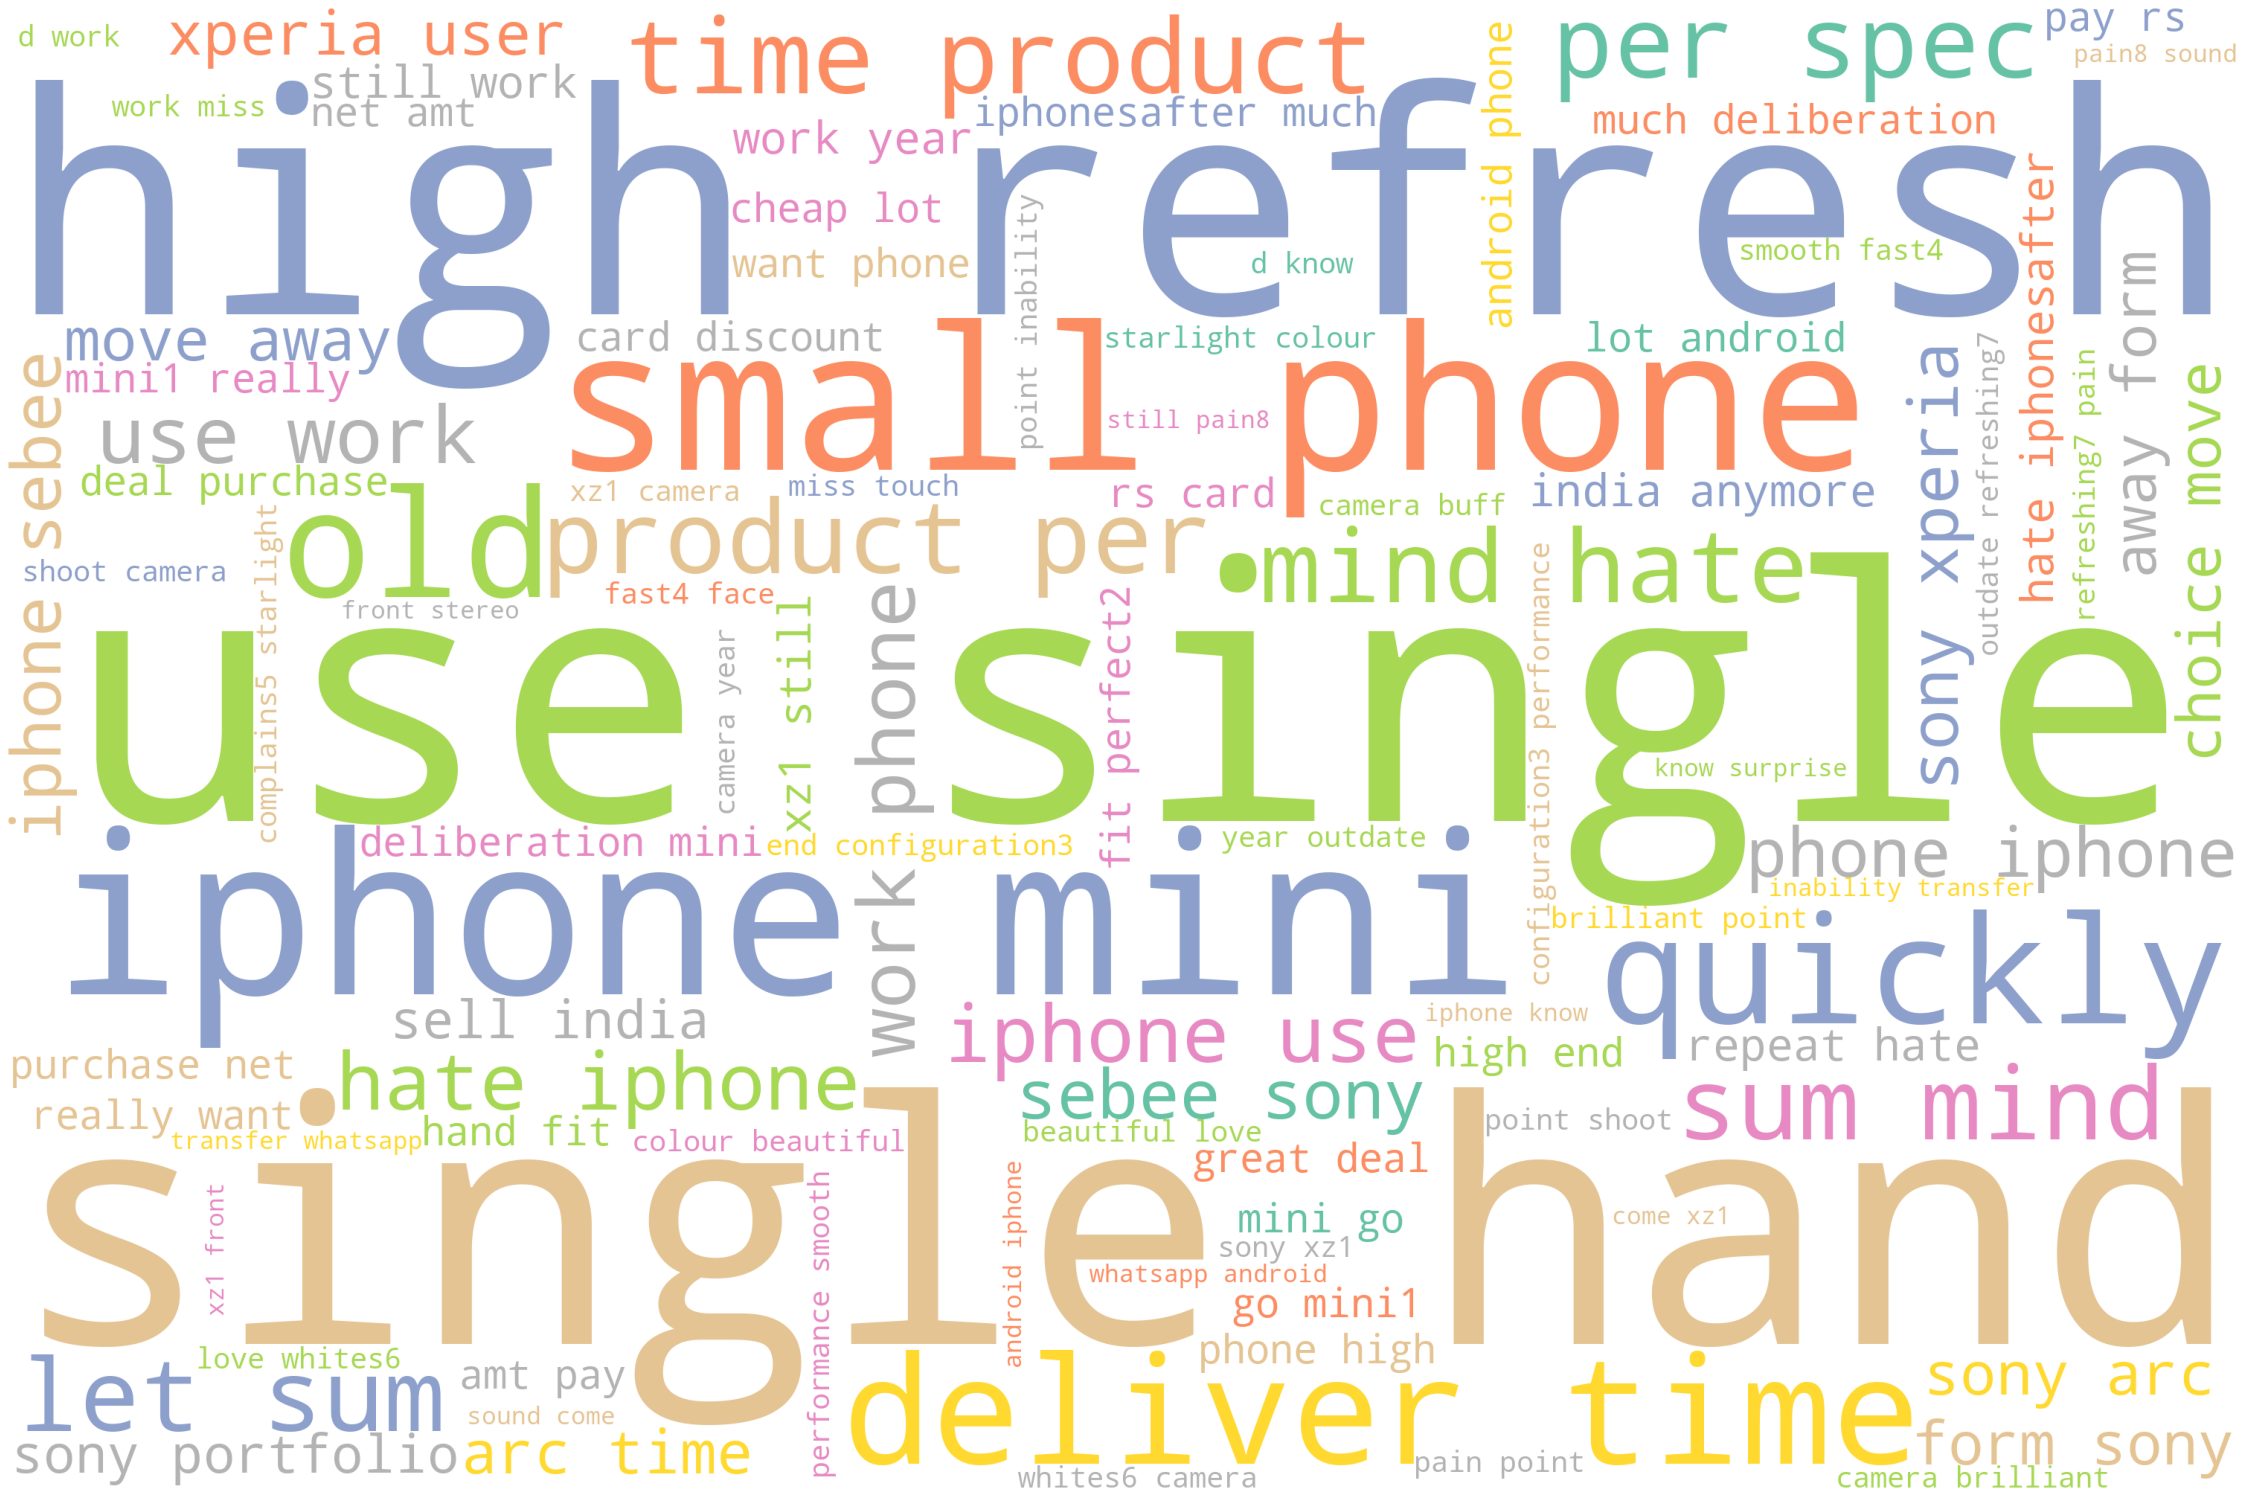

In [73]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

#### 5. Named Entity Recognition (NER)

In [74]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [75]:
for token in doc_block[100:200]:
    print(token,token.pos_)

do AUX
not PART
like VERB
work NOUN
miss ADJ
touch NOUN
i PRON
d AUX
know VERB
get VERB
so ADV
complains5 ADJ
starlight VERB
colour ADJ
beautiful ADJ
love NOUN
whites6 NOUN
camera NOUN
brilliant ADJ
point NOUN
shoot VERB
camera NOUN
buff PROPN
my PRON
sony NOUN
xz1 PROPN
camera NOUN
5 NUM
year NOUN
outdate NOUN
refreshing7 NOUN
pain NOUN
point NOUN
inability NOUN
transfer NOUN
whatsapp ADJ
android VERB
iphone NOUN
know VERB
surprise NOUN
but CCONJ
still ADV
pain8 ADJ
sound PROPN
come VERB
xz1 SYM
front ADJ
stereo NOUN
experience NOUN
not PART
many ADJ
phone NOUN
sound NOUN
quality NOUN
this DET
phone NOUN
top ADJ
quality NOUN
so ADV
satisfied ADJ
quality9 NOUN
display NOUN
still ADV
love VERB
lcd ADJ
panel NOUN
but CCONJ
pretty ADV
sharp ADJ
bright ADJ
love NOUN
it10 PROPN
notch NOUN
do AUX
not PART
hurt VERB
eye NOUN
so ADV
do AUX
not PART
really ADV
care VERB
again ADV
know VERB
gettingif NOUN
power NOUN
user NOUN
concern NOUN
battery NOUN
power PROPN
bank NOUN
may AUX
useful ADJ
fee

In [76]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['gettingif', 'power', 'user', 'concern', 'battery', 'bank', 'feel', 'problem', 'user', 'prosform', 'factor', 'phone', 'market', 'offer', 'combination', 'ease', 'use', 'pocketability', 'performance', 'joy', 'use', 'handedbattery', 'life', 'compare', 'android', 'flagship', 'iphone', 'sufficientperformance', 'stutter', 'lag', 'freeze', 'whatsoeverdisplay', 'resolution', 'combine', 'screen', 'size', 'mean', 'density', 'refresh', 'rate', 'thoughcameras', 'm', 'photography', 'enthusiast', 're', 'point', 'click', 'note20', 'doableconsio', 'bag', 'get', 'impression', 'design', 'intention', 'end', 'user', 'adapt', 'prefer', 'customise', 'os', 'usage', 'adapt', 'people', 'prefer', 'case', 'protector', 'accessory', 'compete', 'product', 'offer', 'extraif', 'use', 'device', 'medium', 'consumption', 'see', 'phone', 'display', 'find', 'feel', 'give', 'nature', 'iphone', 'suit', 'communication', 'device', 'entertainment', 'want', 'iphone', 'work', 'call', 'text', 'email', 'iphone', 'model', 'iphone'

In [77]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,1560
1,iphone,1320
2,use,720
3,work,720
4,camera,720
5,product,480
6,get,480
7,performance,480
8,user,480
9,want,360


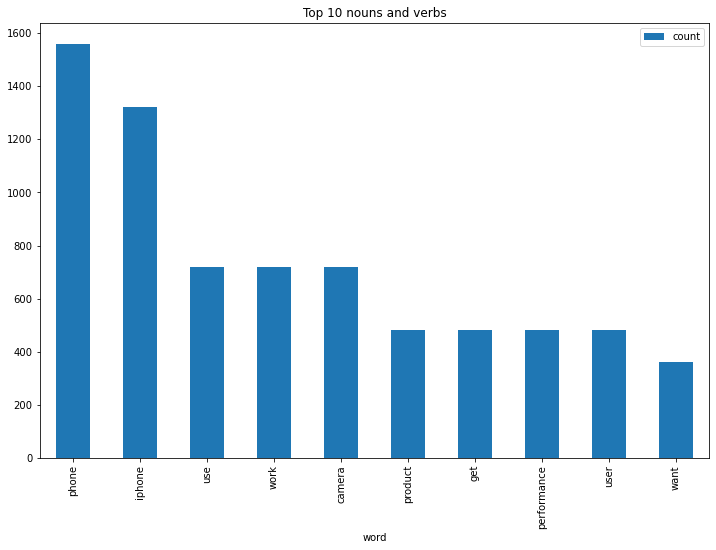

In [78]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

#### 6. Emotion Mining - Sentiment Analysis

In [79]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

['Delivered on time and the product was as per specs.',
 'No cheating.',
 'Delivered on time and the product was as per specs.',
 'No cheating.',
 'Let me sum up my mind here.',
 'I hate Iphones.',
 "I used to have an work phone (Iphone SE).Being a Sony Xperia user since Sony Arc times, I didn't have a choice to move away form the Sony portfolio as they don't sell in India anymore.",
 'My XZ1 is still working after 5.5 years, but she is getting old.',
 'And I repeat I hate IPhones.After much deliberation between 12, 13 and 13 Mini, I went with 13 Mini.1.',
 'I really wanted a phone I could use in a single hand, it fits perfect.2.',
 'I got a great deal on the purchase, as the net amt I paid was Rs.',
 '58,900 after card discounts.',
 'So it is cheaper than a lot of Android phones with high end configuration.3.',
 'Performance.',
 'It is smooth and fast.4.',
 'Face Id works.',
 "I don't like it, but it works, I miss the Touch Id, but i knew what I was getting.",
 'So no complains.5.',
 

In [80]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,Delivered on time and the product was as per s...
1,No cheating.
2,Delivered on time and the product was as per s...
3,No cheating.
4,Let me sum up my mind here.
...,...
7978,Anything and everything.
7979,Been a iPhone user earlier also.
7980,Was skeptical about purchasing a relatively ex...
7981,"If you’re coming for a small phone, this is ba..."


In [81]:
# Emotion Lexicon - Affin
affin = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\DS Assignments\Assignment 11\Afinn.csv" ,sep=',' ,encoding='latin-1')
affin
#sep=',',

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [82]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [83]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [84]:
# manual testing
calculate_sentiment(text='good service')

3

In [85]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0        0
1       -1
2        0
3       -1
4        0
        ..
7978     0
7979     0
7980     3
7981    22
7982     5
Name: sentiment_value, Length: 7983, dtype: int64

In [86]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0       10
1        2
2       10
3        2
4        7
        ..
7978     3
7979     6
7980    44
7981    79
7982    18
Name: word_count, Length: 7983, dtype: int64

In [87]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
5806,The only pain point is inability to transfer W...,-4,13
5113,The only pain point is inability to transfer W...,-4,13
6787,The only pain point is inability to transfer W...,-4,13
2934,The only pain point is inability to transfer W...,-4,13
4144,The only pain point is inability to transfer W...,-4,13
...,...,...,...
6980,"If you’re coming for a small phone, this is ba...",22,79
7981,"If you’re coming for a small phone, this is ba...",22,79
7648,"If you’re coming for a small phone, this is ba...",22,79
2589,"If you’re coming for a small phone, this is ba...",22,79


In [88]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    7983.000000
mean        1.428035
std         3.580243
min        -4.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        22.000000
Name: sentiment_value, dtype: float64

In [89]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,Delivered on time and the product was as per s...,0,10
1,No cheating.,-1,2
2,Delivered on time and the product was as per s...,0,10
3,No cheating.,-1,2
4,Let me sum up my mind here.,0,7
...,...,...,...
7973,Battry life is average.,0,4
7976,My iPhone SE 128GB 1st Generation from 2018 (c...,0,16
7977,Apple continues to find new methods to irritat...,0,11
7978,Anything and everything.,0,3


In [90]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
9,I really wanted a phone I could use in a singl...,2,15
10,"I got a great deal on the purchase, as the net...",2,16
18,The Starlight colour is beautiful.,3,5
19,I love whites.6.,3,3
20,Camera is brilliant.,4,3
...,...,...,...
7974,Camera is perfect Product is just fantastic bu...,7,11
7975,The Cameras do not support Macro/Close-up shots.,2,7
7980,Was skeptical about purchasing a relatively ex...,3,44
7981,"If you’re coming for a small phone, this is ba...",22,79


In [91]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,Delivered on time and the product was as per s...,0,10,0
1,No cheating.,-1,2,1
2,Delivered on time and the product was as per s...,0,10,2
3,No cheating.,-1,2,3
4,Let me sum up my mind here.,0,7,4
...,...,...,...,...
7978,Anything and everything.,0,3,7978
7979,Been a iPhone user earlier also.,0,6,7979
7980,Was skeptical about purchasing a relatively ex...,3,44,7980
7981,"If you’re coming for a small phone, this is ba...",22,79,7981


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

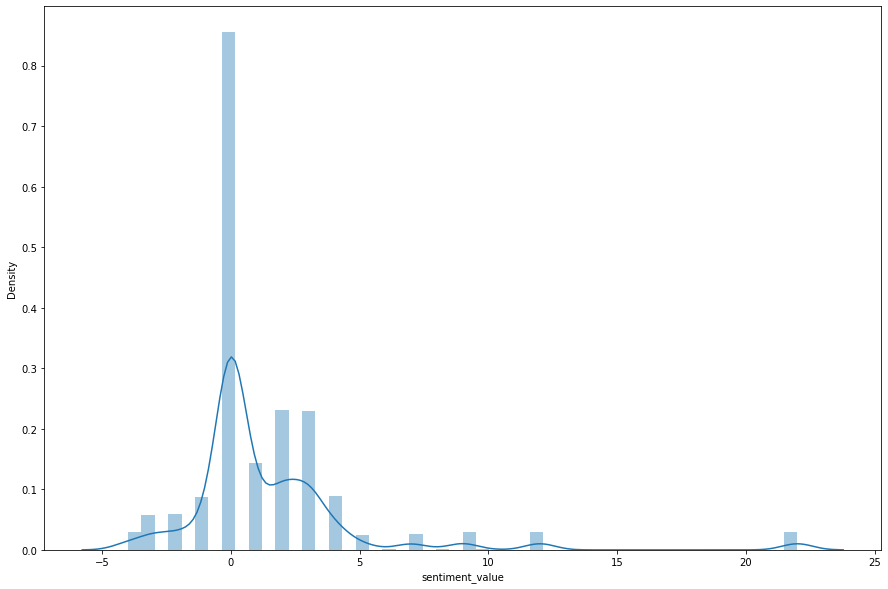

In [92]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

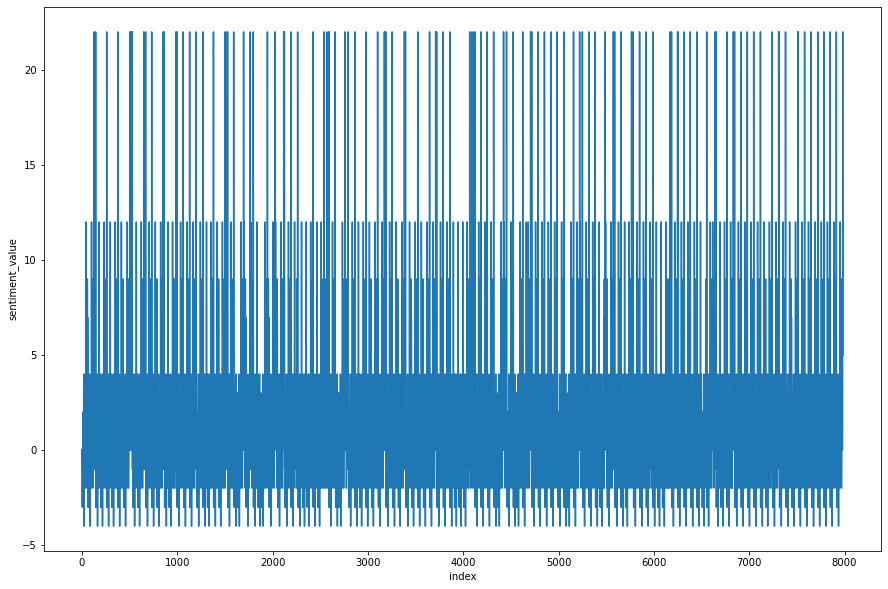

In [93]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)